In [ ]:
from google.colab import files

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt



# Upload the CSV file from your local drive
uploaded = files.upload()

# Specify the name of the uploaded file
file_name = "IMDB_Dataset.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving IMDB_Dataset.csv to IMDB_Dataset.csv


#Data analysis and visualisations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [ ]:
df.isna()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [ ]:
value_counts = df['sentiment'].value_counts()
value_counts

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
print(df['review'].nunique())

49582


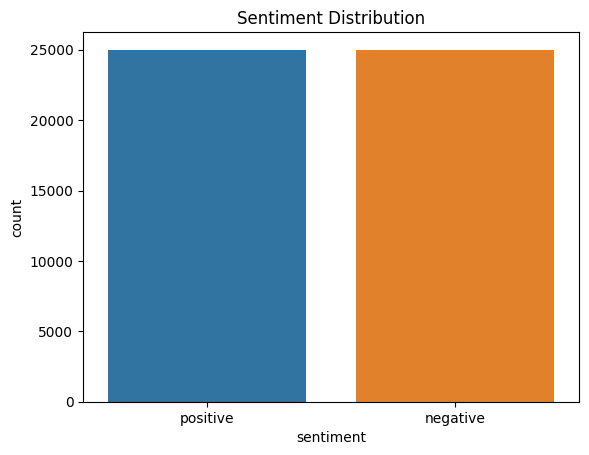

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

# Sample 2500 positive and 2500 negative reviews randomly
sample_positive = positive_reviews.sample(n=500, random_state=42)
sample_negative = negative_reviews.sample(n=500, random_state=42)

# Concatenate the samples to get a total sample of 5000 reviews
final_sample = pd.concat([sample_positive, sample_negative])

# Shuffle the final sample to ensure randomness
final_sample = final_sample.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
final_sample.head(20)

,review,sentiment
0,"For Daniel Auteuil, `Queen Margot' was much be...",negative
1,Spoilers abound. You have been warned.<br /><b...,negative
2,"Where do I start? The plot of the movie, which...",negative
3,There was a genie played by Shaq His name was ...,negative
4,Its a very good comedy movie.Ijust liked it.I ...,positive
5,Please don't waste your money on this sorry ex...,negative
6,I starred as Eugene Morris Jerome in my high s...,negative
7,With Pep Squad receiving an average of 4.7 on ...,negative
8,"Well, I watched this film expecting to be roll...",negative
9,this movie is funny funny funny my favorite qu...,positive


#Different ML approaches

## 1. LSTM

<ipython-input-10-517950260b38>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


Epoch 1/5
10/10 [==============================] - 16s 1s/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6911 - val_accuracy: 0.4938
Epoch 2/5
10/10 [==============================] - 16s 2s/step - loss: 0.6744 - accuracy: 0.8047 - val_loss: 0.6853 - val_accuracy: 0.5562
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 0.6196 - accuracy: 0.8281 - val_loss: 0.6690 - val_accuracy: 0.5688
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.5365 - accuracy: 0.8969 - val_loss: 0.6564 - val_accuracy: 0.5938
Epoch 5/5
7/7 [==============================] - 1s 200ms/step - loss: 0.5996 - accuracy: 0.6600
Test Loss - LSTM: 0.5996
Test Accuracy - LSTM: 66.00%
7/7 [==============================] - 2s 200ms/step


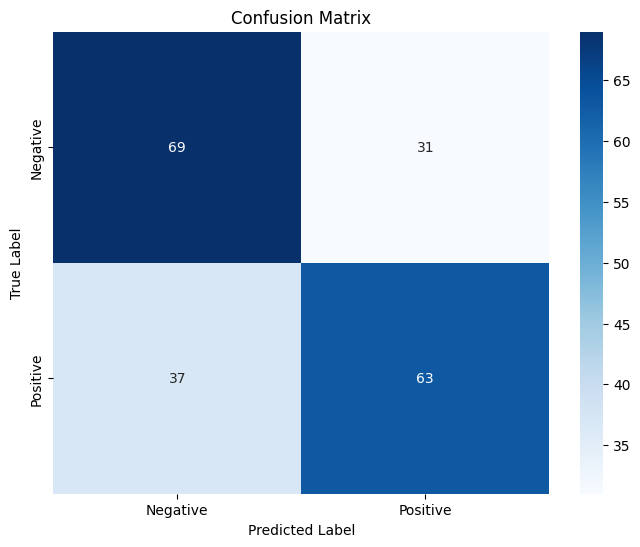

F1 Score: 0.6495
Confusion Matrix:
[[69 31]
 [37 63]]


In [ ]:
#Approach 1 : LSTM model

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(final_sample['review'])
X = tokenizer.texts_to_sequences(final_sample['review'])
X = np.array(X)

# Encode sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_sample['sentiment'])

X = pad_sequences(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test)
print(f'Test Loss - LSTM: {loss_lstm:.4f}')
print(f'Test Accuracy - LSTM: {accuracy_lstm * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1) based on a threshold (e.g., 0.5)
binary_predictions = (predictions > 0.5).astype(int)

# Decode the encoded labels (if using LabelEncoder)
decoded_predictions = label_encoder.inverse_transform(binary_predictions.flatten())

# Convert X_test back to text
test_reviews = [tokenizer.sequences_to_texts([seq])[0] for seq in X_test]

# Create a DataFrame with the actual sentiments and predictions
results_lstm = pd.DataFrame({'Review': test_reviews,
                        'Actual Sentiment': label_encoder.inverse_transform(y_test),
                        'Predicted Sentiment': decoded_predictions})

# Convert sentiment labels to binary format (0 or 1)
results_lstm['Actual Binary'] = results_lstm['Actual Sentiment'].map({'negative': 0, 'positive': 1})
results_lstm['Predicted Binary'] = results_lstm['Predicted Sentiment'].map({'negative': 0, 'positive': 1})

# Calculate F1 score
f1 = f1_score(results_lstm['Actual Binary'], results_lstm['Predicted Binary'])

# Create confusion matrix
cm = confusion_matrix(results_lstm['Actual Binary'], results_lstm['Predicted Binary'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print F1 score and confusion matrix
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

In [ ]:
results_lstm.head(30)

,Review,Actual Sentiment,Predicted Sentiment,Actual Binary,Predicted Binary
0,bad personal opinion the folks who made it the...,negative,negative,0,0
1,this movie is obviously low budget filmed in b...,positive,positive,1,1
2,yes this movie has kids going to space camp an...,negative,negative,0,0
3,before i begin let me tell you how great this ...,positive,negative,1,0
4,the vampire bat is set in the small german vil...,negative,negative,0,0
5,i cant go for long describing this tittle simp...,negative,negative,0,0
6,excellent gritty and true portrayal of pioneer...,positive,negative,1,0
7,this is a very underrated movie to say the lea...,positive,negative,1,0
8,there's something intriguing about disaster mo...,negative,negative,0,0
9,i didn't expect much when i decided to watch t...,positive,negative,1,0


## 2. K-fold cross validations with LSTM



Test Loss - LSTM k-fold: 0.6250
Test Accuracy - LSTM k-fold: 64.50%
7/7 [==============================] - 3s 339ms/step


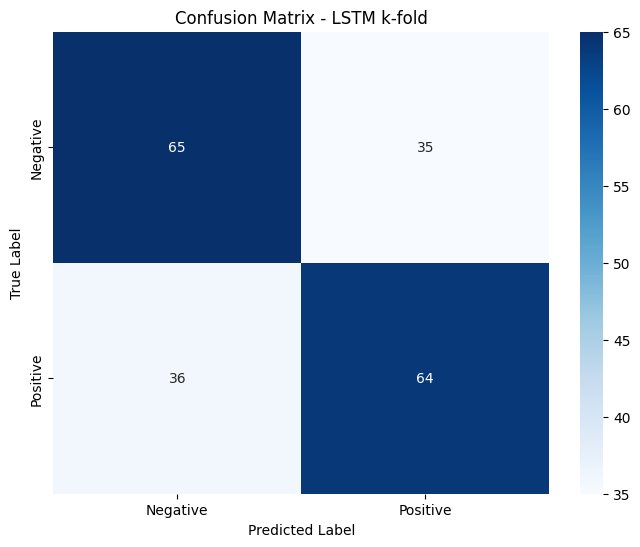

F1 Score - LSTM k-fold: 0.6432
Confusion Matrix - LSTM k-fold:
[[65 35]
 [36 64]]
Test Loss - LSTM k-fold: 0.6845
Test Accuracy - LSTM k-fold: 57.50%
7/7 [==============================] - 3s 352ms/step


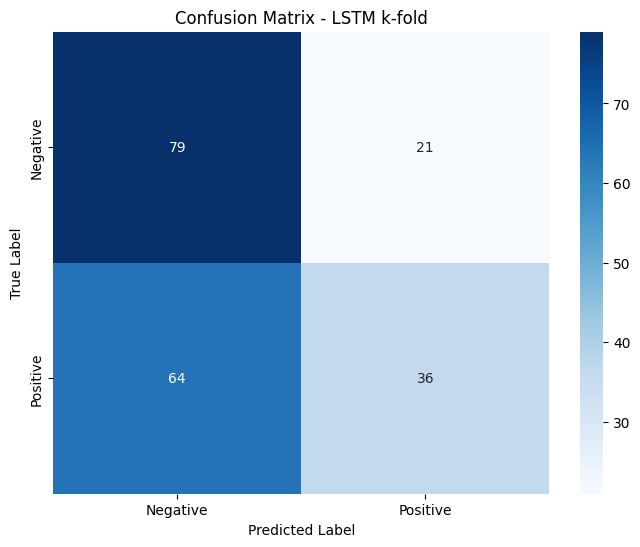

F1 Score - LSTM k-fold: 0.4586
Confusion Matrix - LSTM k-fold:
[[79 21]
 [64 36]]
Test Loss - LSTM k-fold: 0.6279
Test Accuracy - LSTM k-fold: 65.00%
7/7 [==============================] - 2s 202ms/step


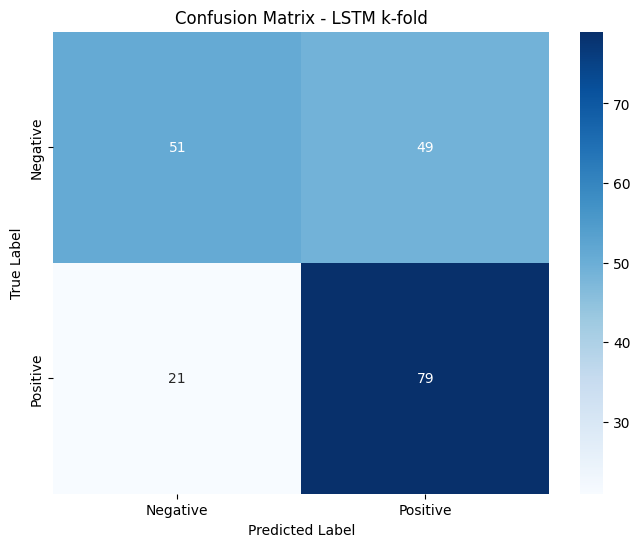

F1 Score - LSTM k-fold: 0.6930
Confusion Matrix - LSTM k-fold:
[[51 49]
 [21 79]]
Test Loss - LSTM k-fold: 0.6238
Test Accuracy - LSTM k-fold: 70.50%
7/7 [==============================] - 2s 209ms/step


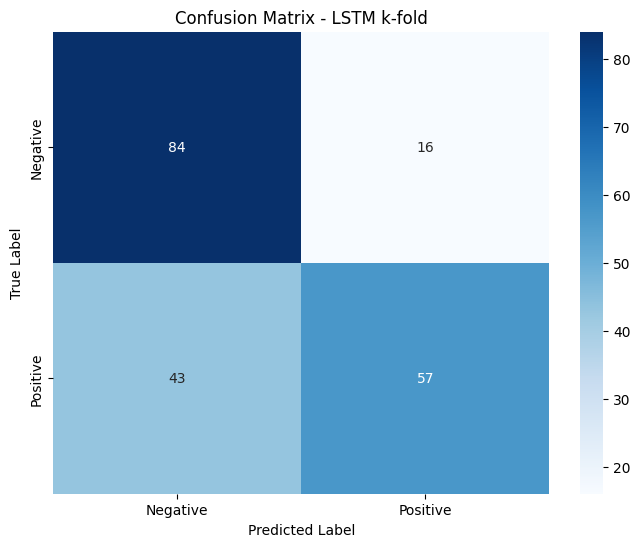

F1 Score - LSTM k-fold: 0.6590
Confusion Matrix - LSTM k-fold:
[[84 16]
 [43 57]]
Test Loss - LSTM k-fold: 0.6439
Test Accuracy - LSTM k-fold: 64.00%
7/7 [==============================] - 2s 201ms/step


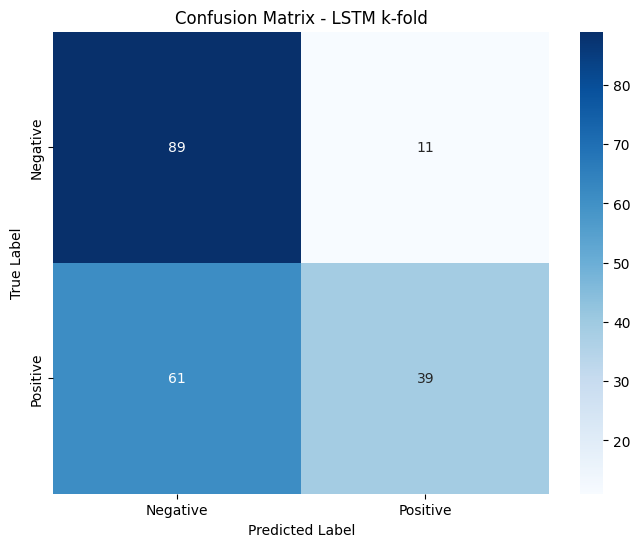

F1 Score - LSTM k-fold: 0.5200
Confusion Matrix - LSTM k-fold:
[[89 11]
 [61 39]]


In [ ]:
# Approach 2: k-fold cross-validation with LSTM
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores_lstm_kfold = []
confusion_matrices_lstm_kfold = []

# Iterate over folds (LSTM k-fold)
for train_index, test_index in kfold.split(X, y):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    y_train_kfold, y_test_kfold = y[train_index], y[test_index]

    model_kfold = Sequential()
    model_kfold.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X.shape[1]))
    model_kfold.add(LSTM(100))
    model_kfold.add(Dense(1, activation='sigmoid'))
    model_kfold.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_kfold.fit(X_train_kfold, y_train_kfold, epochs=5, batch_size=64, validation_split=0.2, verbose=0)

    loss_kfold, accuracy_kfold = model_kfold.evaluate(X_test_kfold, y_test_kfold, verbose=0)
    print(f'Test Loss - LSTM k-fold: {loss_kfold:.4f}')
    print(f'Test Accuracy - LSTM k-fold: {accuracy_kfold * 100:.2f}%')

    # Make predictions on the test set (LSTM k-fold)
    predictions_kfold = model_kfold.predict(X_test_kfold)
    binary_predictions_kfold = (predictions_kfold > 0.5).astype(int)

    # Decode the encoded labels (if using LabelEncoder)
    decoded_predictions_kfold = label_encoder.inverse_transform(binary_predictions_kfold.flatten())

    # Convert X_test_kfold back to text
    test_reviews_kfold = [tokenizer.sequences_to_texts([seq])[0] for seq in X_test_kfold]

    # Create a DataFrame with the actual sentiments and predictions (LSTM k-fold)
    results_kfold = pd.DataFrame({'Review': test_reviews_kfold,
                                  'Actual Sentiment': label_encoder.inverse_transform(y_test_kfold),
                                  'Predicted Sentiment': decoded_predictions_kfold})

    # Convert sentiment labels to binary format (0 or 1)
    results_kfold['Actual Binary'] = results_kfold['Actual Sentiment'].map({'negative': 0, 'positive': 1})
    results_kfold['Predicted Binary'] = results_kfold['Predicted Sentiment'].map({'negative': 0, 'positive': 1})

    # Calculate F1 score
    f1_kfold = f1_score(results_kfold['Actual Binary'], results_kfold['Predicted Binary'])

    # Create confusion matrix
    cm_kfold = confusion_matrix(results_kfold['Actual Binary'], results_kfold['Predicted Binary'])

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_kfold, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix - LSTM k-fold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Print F1 score and confusion matrix
    print(f'F1 Score - LSTM k-fold: {f1_kfold:.4f}')
    print('Confusion Matrix - LSTM k-fold:')
    print(cm_kfold)

In [ ]:
results_kfold.head(30)

,Review,Actual Sentiment,Predicted Sentiment,Actual Binary,Predicted Binary
0,this movie is funny funny funny my favorite qu...,positive,negative,1,0
1,he who fights with monsters might take care le...,negative,negative,0,0
2,the plot of this movie is dangerously thin and...,negative,negative,0,0
3,i've seen a few of mr boorman's movies and did...,positive,negative,1,0
4,end game started well the least said about the...,negative,negative,0,0
5,what more could i say the americans totally ha...,positive,positive,1,1
6,yes i admire the independent spirit of it all ...,negative,negative,0,0
7,this low budget b horror's plot comes with all...,negative,negative,0,0
8,the first full length film featuring the aardm...,positive,negative,1,0
9,i think the weighted average for this film is ...,positive,positive,1,1


## 3. K-fold cross validation with SVM

Test Accuracy - SVM k-fold: 82.50%


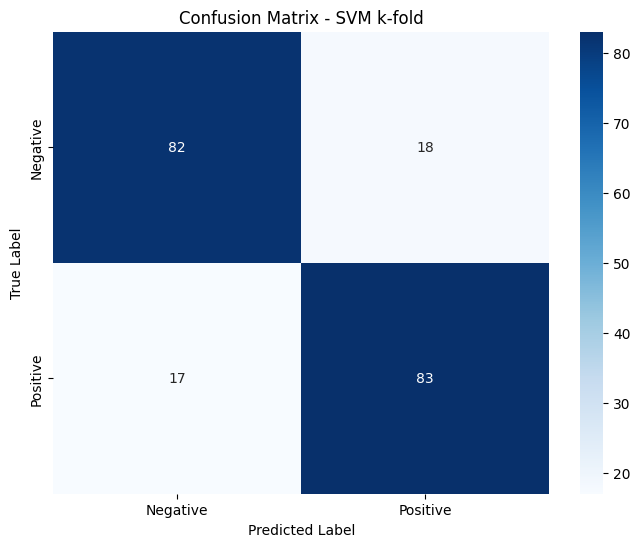

F1 Score - SVM k-fold: 0.8259
Confusion Matrix - SVM k-fold:
[[82 18]
 [17 83]]
Test Accuracy - SVM k-fold: 79.00%


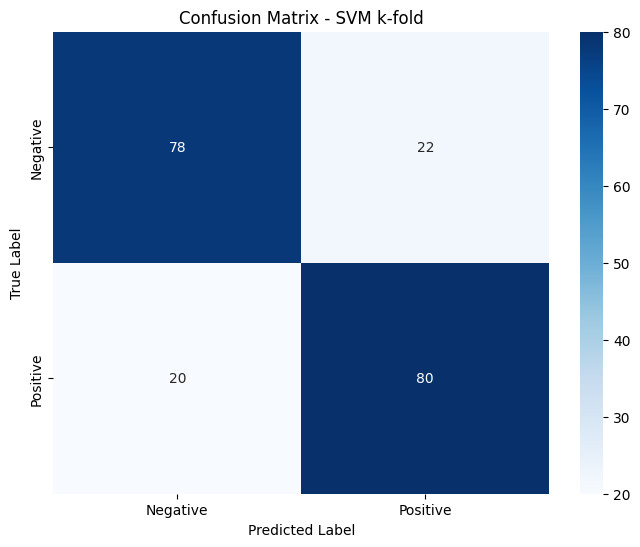

F1 Score - SVM k-fold: 0.7921
Confusion Matrix - SVM k-fold:
[[78 22]
 [20 80]]
Test Accuracy - SVM k-fold: 80.00%


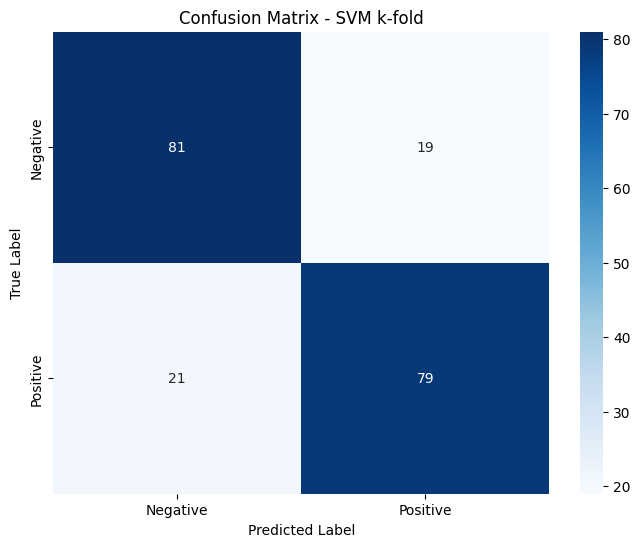

F1 Score - SVM k-fold: 0.7980
Confusion Matrix - SVM k-fold:
[[81 19]
 [21 79]]
Test Accuracy - SVM k-fold: 81.50%


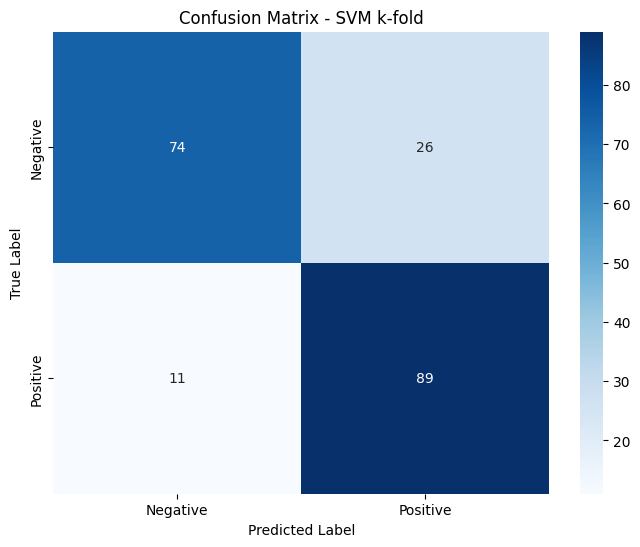

F1 Score - SVM k-fold: 0.8279
Confusion Matrix - SVM k-fold:
[[74 26]
 [11 89]]
Test Accuracy - SVM k-fold: 78.50%


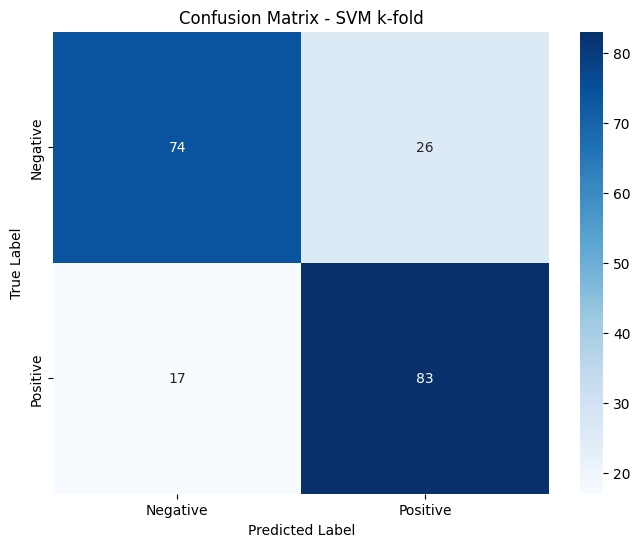

F1 Score - SVM k-fold: 0.7943
Confusion Matrix - SVM k-fold:
[[74 26]
 [17 83]]


In [ ]:
# Approach 3: k-fold cross-validation with SVM
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(final_sample['review']).toarray()

label_encoder_svm = LabelEncoder()
y_encoded_svm = label_encoder_svm.fit_transform(final_sample['sentiment'])

kfold_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores_svm_kfold = []
confusion_matrices_svm_kfold = []

# Iterate over folds (SVM k-fold)
for train_index, test_index in kfold_svm.split(X_tfidf, y_encoded_svm):
    X_train_svm_kfold, X_test_svm_kfold = X_tfidf[train_index], X_tfidf[test_index]
    y_train_svm_kfold, y_test_svm_kfold = y_encoded_svm[train_index], y_encoded_svm[test_index]

    svm_model_kfold = SVC(kernel='linear', C=1.0, probability=True)
    svm_model_kfold.fit(X_train_svm_kfold, y_train_svm_kfold)

    # Evaluate model (SVM k-fold)
    accuracy_svm_kfold = svm_model_kfold.score(X_test_svm_kfold, y_test_svm_kfold)
    print(f'Test Accuracy - SVM k-fold: {accuracy_svm_kfold * 100:.2f}%')

    # Make predictions on the test set (SVM k-fold)
    # Make predictions on the test set (SVM k-fold)
    predictions_svm_kfold = svm_model_kfold.predict(X_test_svm_kfold)

    # Decode the encoded labels (if using LabelEncoder)
    decoded_predictions_svm_kfold = label_encoder_svm.inverse_transform(predictions_svm_kfold)

    # Convert X_test_svm_kfold back to text (if needed)
    test_reviews_svm_kfold = tfidf_vectorizer.inverse_transform(X_test_svm_kfold)

    # Create results DataFrame (SVM k-fold)
    results_svm_kfold = pd.DataFrame({'Review': test_reviews_svm_kfold,
                                      'Actual Sentiment': label_encoder_svm.inverse_transform(y_test_svm_kfold),
                                      'Predicted Sentiment': decoded_predictions_svm_kfold})

    # Convert sentiment labels to binary format (0 or 1)
    results_svm_kfold['Actual Binary'] = results_svm_kfold['Actual Sentiment'].map({'negative': 0, 'positive': 1})
    results_svm_kfold['Predicted Binary'] = results_svm_kfold['Predicted Sentiment'].map({'negative': 0, 'positive': 1})

    # Calculate F1 score
    f1_svm_kfold = f1_score(results_svm_kfold['Actual Binary'], results_svm_kfold['Predicted Binary'])

    # Create confusion matrix
    cm_svm_kfold = confusion_matrix(results_svm_kfold['Actual Binary'], results_svm_kfold['Predicted Binary'])

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_svm_kfold, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix - SVM k-fold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Print F1 score and confusion matrix
    print(f'F1 Score - SVM k-fold: {f1_svm_kfold:.4f}')
    print('Confusion Matrix - SVM k-fold:')
    print(cm_svm_kfold)


In [ ]:
results_svm_kfold.head(30)

,Review,Actual Sentiment,Predicted Sentiment,Actual Binary,Predicted Binary
0,"[about, an, and, another, are, be, but, charac...",positive,positive,1,1
1,"[about, all, also, among, an, and, anyone, app...",negative,negative,0,0
2,"[90, able, about, actress, actually, and, as, ...",negative,negative,0,0
3,"[15, after, again, all, although, american, an...",positive,negative,1,0
4,"[30, about, an, and, apart, are, at, average, ...",negative,negative,0,0
5,"[10, 100, 13, 18, 20, 2002, about, action, act...",positive,negative,1,0
6,"[about, admire, all, american, and, are, attem...",negative,negative,0,0
7,"[afford, after, alive, all, also, an, and, any...",negative,negative,0,0
8,"[again, aired, all, along, and, animated, anot...",positive,positive,1,1
9,"[although, average, by, entertaining, few, fil...",positive,positive,1,1
